# Принятие решений в бизнесе.

Аналитик крупного интернет-магазина вместе с отделом маркетинга подготовили список гипотез для увеличения выручки. 

**Цель исследования:**
- Приоритизируем гипотезы
- Запустим A/B-тест
- Проанализируем результаты

**Ход исследования**

Данные для первой части

Файл /datasets/hypothesis.csv. 

    -	Hypothesis — краткое описание гипотезы;
    -	Reach — охват пользователей по 10-балльной шкале;
    -	Impact — влияние на пользователей по 10-балльной шкале;
    -	Confidence — уверенность в гипотезе по 10-балльной шкале;
    -	Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


Проверяем гипотезы метриками ICE и RICE.

Данные для второй части

Файл /datasets/orders.csv. 

    -	transactionId — идентификатор заказа;
    -	visitorId — идентификатор пользователя, совершившего заказ;
    -	date — дата, когда был совершён заказ;
    -	revenue — выручка заказа;
    -	group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

    -	date — дата;
    -	group — группа A/B-теста;
    -	visitors — количество пользователей в указанную дату в указанной группе A/B-теста


In [1]:
# импортируем библиотеки
import pandas as pd
import scipy.stats as stats
import datetime as dt
from scipy import stats as st
import numpy as np
import math as mth
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

In [2]:
# прочтем файл и создадим датафрейм
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

## Приоритизация гипотез.

In [3]:
 # посмотрим общую информацию о данных
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [4]:
# напишем код, чтобы отображались гипотезы полностью
pd.options.display.max_colwidth = 100

In [5]:
# посмотрим 9 гипотез по увеличению выручки интернет-магазина
hypothesis.head(9) 

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
# переведем названия столбцов в нижний регистр
hypothesis.columns = hypothesis.columns.str.lower() 

In [7]:
# применим формулу ICE
hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence'])/ hypothesis['efforts']

In [8]:
# отсортируем гипотезы по ICE
print(round(hypothesis[['hypothesis','ICE']], 2).sort_values('ICE', ascending=False))

                                                                                            hypothesis  \
8                                              Запустить акцию, дающую скидку на товар в день рождения   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
4                     Изменить цвет фона главн

*Комментарий*
    
Наиболее перспективные гипотезы по ICE:
+ Запустить акцию, дающую скидку на товар в день рождения
+ Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
+ Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
+ Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
+ Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [9]:
# применим формулу RICE
hypothesis['RICE'] = (hypothesis['reach']* hypothesis['impact']* hypothesis['confidence']) / hypothesis['efforts'] 

In [10]:
# отсортируем гипотезы по RICE
print(round(hypothesis[['hypothesis', 'RICE']], 2).sort_values('RICE', ascending=False))

                                                                                            hypothesis  \
7     Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...   
0   Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6  Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...   
8                                              Запустить акцию, дающую скидку на товар в день рождения   
3  Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                            Запустить собственную службу доставки, что сократит срок доставки заказов   
5             Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
4                     Изменить цвет фона главн

*Комментарий*

Эффективными гипотезами по RICE будут:
+ Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
+ Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
+ Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
+ Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
+ Запустить акцию, дающую скидку на товар в день рождения    


### Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясним, почему так произошло.

При применении метрики RICE на первом месте оказалась гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок", потому что параметр reach у этой гипотезы больше остальных, и она охватывает больше пользователей. У метрики ICE на первом месте гипотеза "Запустить акцию, дающую скидку на товар в день рождения", но из-за того, что параметр reach у неё самый низкий, она сместилась на несколько позиций ниже. 


## Анализ A/B-теста.

In [11]:
# рассмотрим датасет
orders.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
# заменим тип даных
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) # заменим тип даных

In [13]:
# проверим наличие полных дубликатов
orders.duplicated().sum()

0

In [14]:
# проверим наличие дубликатов с visitorId
orders['visitorId'].duplicated().sum()

166

In [15]:
# проверим количество уникальных пользователе
orders['visitorId'].nunique()

1031

In [16]:
orders.shape

(1197, 5)

In [17]:
# найдем пользователей, которые попали в две группы
orders.groupby('visitorId').agg({'group' : 'nunique'}).query('group > 1').count()

group    58
dtype: int64

*Комментарий*
При таких довольно небольших пересечениях оставляем этих пользователей как есть.


In [18]:
# рассмотрим датасет
visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [19]:
# заменим тип даных
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d')) 

In [20]:
# проверим наличие полных дубликатов
visitors.duplicated().sum()

0

*Комментарий* Данные просмотрели и изменили тип данных у столбцов с датами.

### Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [21]:
# определяем уникальные значения дат и групп
ordersdtgr = orders[['date', 'group']].drop_duplicates() 

In [22]:
# кумулятивные показатели из orders
ordersaggregated = ordersdtgr.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg({'date': 'max','group': 'max','transactionId': 'nunique','visitorId': 'nunique','revenue': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [23]:
# кумулятивные показатели из visitors
visitorsaggregated = ordersdtgr.apply(
    lambda x: visitors[
        np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max','group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [24]:
# соединяем данные в таблицу
cumulative_date = ordersaggregated.merge(visitorsaggregated, left_on=['date', 'group'], right_on=['date', 'group'])

In [25]:
cumulative_date.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [26]:
# переименуем столбцы
cumulative_date.columns = [ 'date','group','orders','buyers','revenue','visitors']

In [27]:
# сформируем группу А
cumulative_revenueA = cumulative_date[cumulative_date['group'] == 'A'][['date', 'revenue', 'orders']]

In [28]:
# сформируем группу Б
cumulative_revenueB = cumulative_date[cumulative_date['group'] == 'B'][['date', 'revenue', 'orders']]

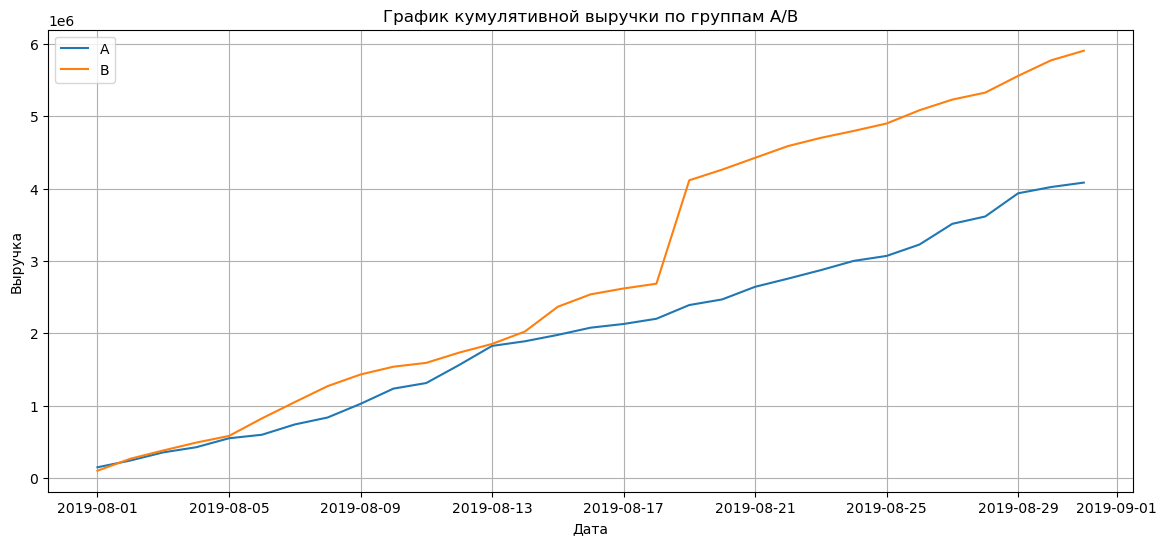

In [76]:
#  построим график кумулятивной выручки по группам
plt.figure(figsize=(14,6))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.grid(True)
plt.ylabel('Выручка')
plt.xlabel('Дата')
plt.title('График кумулятивной выручки по группам A/B')
plt.legend()
plt.show();

*Комментарий*

Куммулятивная выручка в двух группах растет. Группа В показывает лучшие результаты в течении всего теста. 
Примерно с 17 августа 2019 г. резкий рост выручки, это может быть связанно с сезонностью и увеличением заказов, либо там присутствуют дорогостиящие заказы. 


### Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

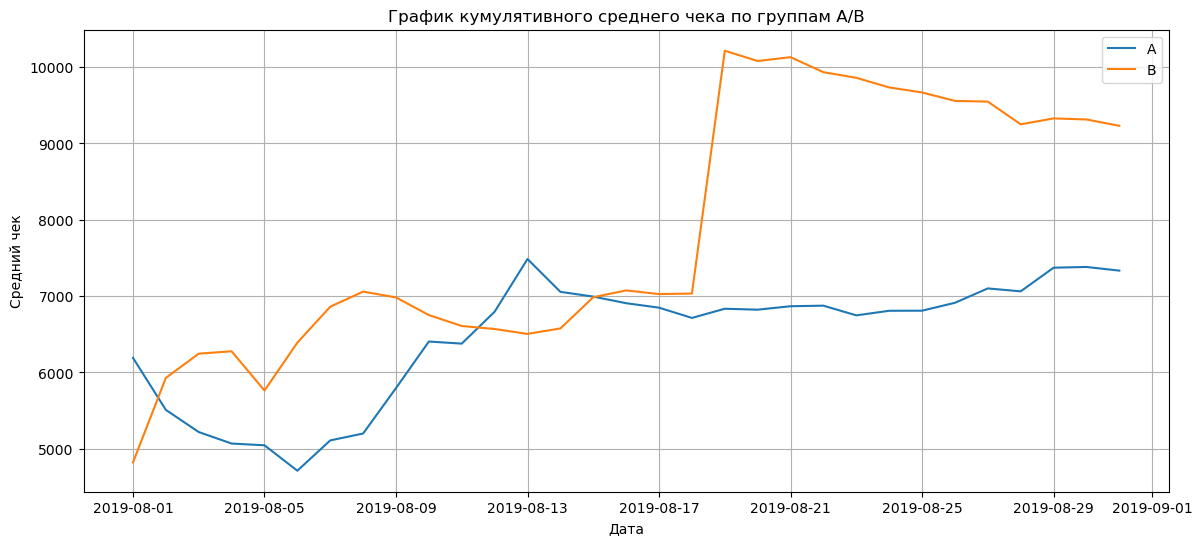

In [75]:
# построим график кумулятивного среднего чека по группам
plt.figure(figsize=(14,6))
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/ cumulative_revenueA['orders'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['orders'], label='B')
plt.grid(True)
plt.ylabel('Средний чек')
plt.xlabel('Дата')
plt.title('График кумулятивного среднего чека по группам A/B')
plt.legend()
plt.show();

*Комментарий*

По среднему чеку можем видеть, что чек В выше, после 17 августа произошел резкий рост в группе В.  Возможно там были дорогостоящие заказы.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения.

In [31]:
# соединим таблицы
mergecumulative_revenue = cumulative_revenueA\
.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

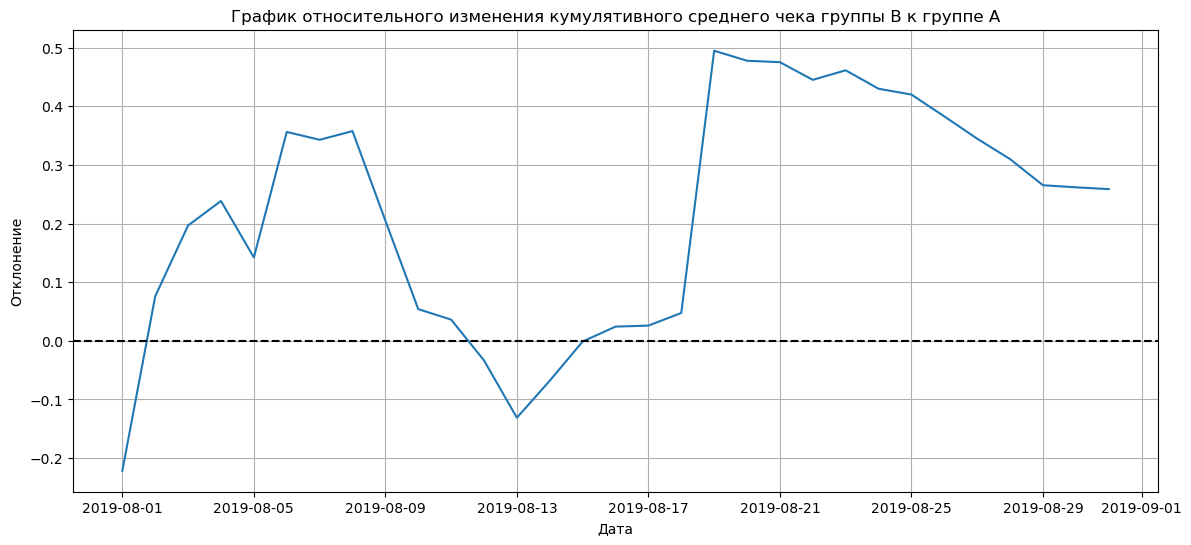

In [73]:
# построим график относительного изменения кумулятивного среднего чека группы B к группе A
plt.figure(figsize=(14,6))
plt.plot(mergecumulative_revenue['date'], (mergecumulative_revenue['revenueB']/ mergecumulative_revenue['ordersB'])
         / (mergecumulative_revenue['revenueA']/ mergecumulative_revenue['ordersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Отклонение')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show();

*Комментарий*

В графике видны скачки с максимальным просиданием 13 августа и резким подъемом после 17 августа. Вероятно резкий рост после 17 августа связан с выбросом, наличие аномалий. 

### Построим график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

In [33]:
# найдем конверсию
cumulative_date['conversion'] = cumulative_date['orders']/cumulative_date['visitors']

In [34]:
# сформируем группу А
cumulative_dateA = cumulative_date[cumulative_date['group'] == 'A']

In [35]:
# сформируем группу Б
cumulative_dateB = cumulative_date[cumulative_date['group'] == 'B']

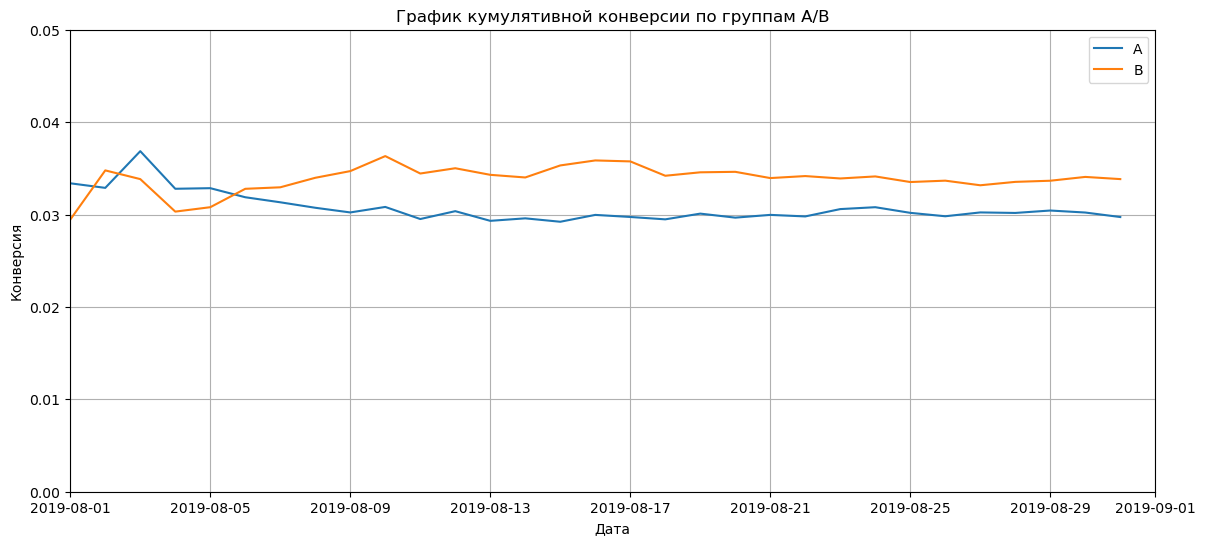

In [77]:
# построим график кумулятивной конверсии по группам
plt.figure(figsize=(14,6))
plt.plot(cumulative_dateA['date'], cumulative_dateA['conversion'], label='A')
plt.plot(cumulative_dateB['date'], cumulative_dateB['conversion'], label='B')
plt.grid(True)
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('График кумулятивной конверсии по группам A/B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05]);

*Комментарий*

К 5 августу конверсия группы В начинает увеличиваться. К 9 августа обе группы зафиксировались и колеблятся примерно с разницей 0,005%. Группа В показывает большую конверсию.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

In [37]:
# объединим таблицы
cum_conv_merge = cumulative_dateA[['date', 'conversion']]\
.merge(cumulative_dateB[['date', 'conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

In [38]:
# переименуем столбцы
cum_conv_merge.columns = ['date', 'conversionA', 'conversionB']

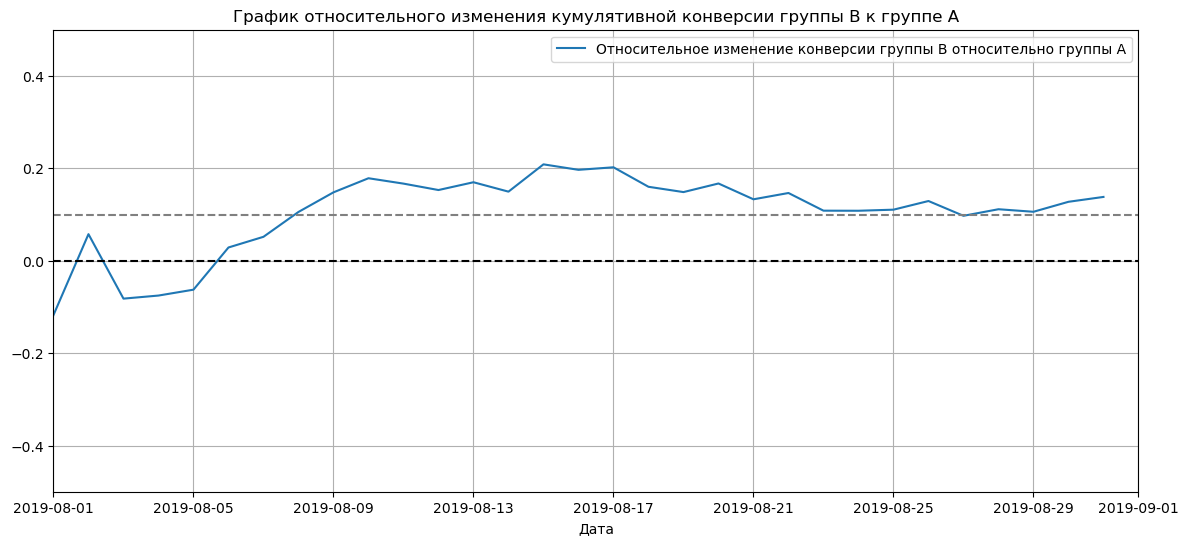

In [78]:
# построим график относительного изменения кумулятивной конверсии группы B к группе A
plt.figure(figsize=(14,6))
plt.plot(cum_conv_merge['date'], cum_conv_merge['conversionB']/cum_conv_merge['conversionA'] - 1, label="Относительное изменение конверсии группы B относительно группы A")
plt.grid(True)
plt.xlabel('Дата')
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5]);

*Комментарий*

Видим изменение роста конверсии группы В по отношению к группе А, примерно на 10%. Далее график колеблется, но тенденция к росту.  

### Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

In [40]:
# создадим таблицу количества заказов пользователей
orders_usr = orders.drop(['group', 'revenue', 'date'], axis=1)\
.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})

In [41]:
# переименуем столбцы
orders_usr.columns = ['userId', 'orders']

In [42]:
orders_usr.head()

,userId,orders
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


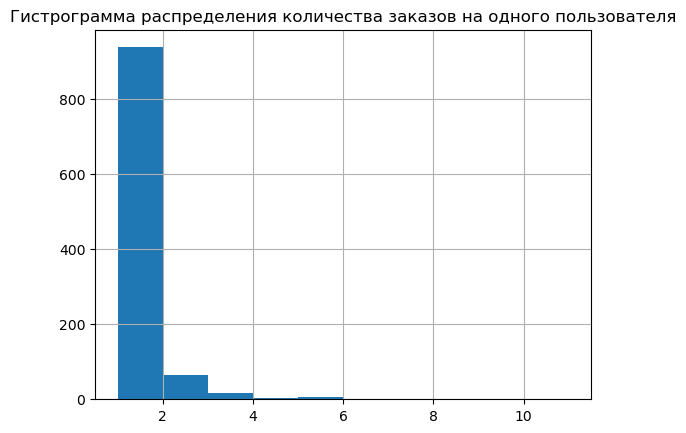

In [43]:
# построим график распределения количества заказов на одного пользователя
plt.hist(orders_usr['orders'])
plt.grid(True)
plt.title('Гистрограмма распределения количества заказов на одного пользователя');

*Комментарий*

Из графика видно, что большее количество приходиться на 1 заказ. Из графика не ясно какое количество пользователей заказывают 2 и более раз.Так же наблюдаем выбросы у значения в 10 заказаов. Построим другой график.

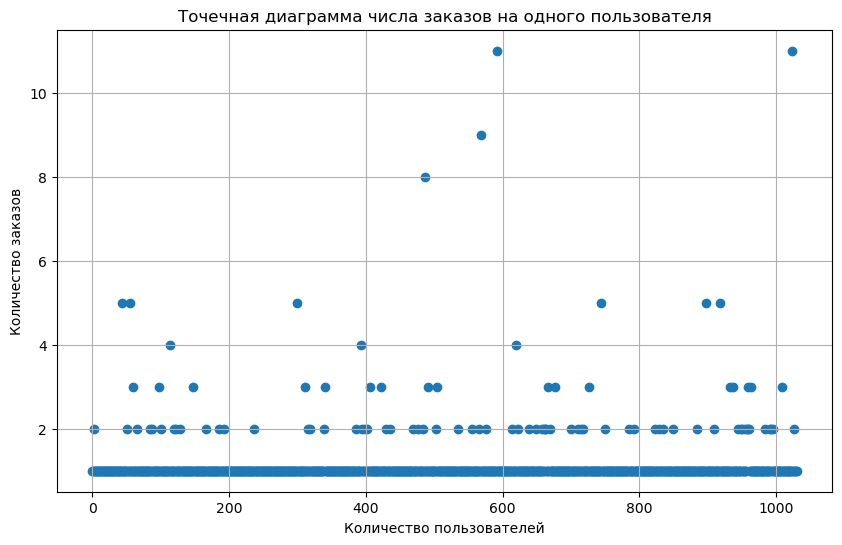

In [44]:
# построим диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0,len(orders_usr)))

plt.figure(figsize=(10,6))
plt.grid(True)
plt.scatter(x_values, orders_usr['orders'])
plt.title('Точечная диаграмма числа заказов на одного пользователя')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.show();

*Комментарий*

Пользователей заказавших 2 раза достаточно. Предположим, что пользователи сделавшие 3 и более заказа могут быть аномалиями.

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [45]:
# посчитаем перцентили
print('Перцентили:', np.percentile(orders_usr['orders'], [95, 99]))

Перцентили: [2. 4.]


*Комментарий*

Более 4 раз заказало - 1% пользователей. 5% приходиться на 2 и более заказов. Для определения аномалий выберем более 2 заказов на одного пользователя.

### Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

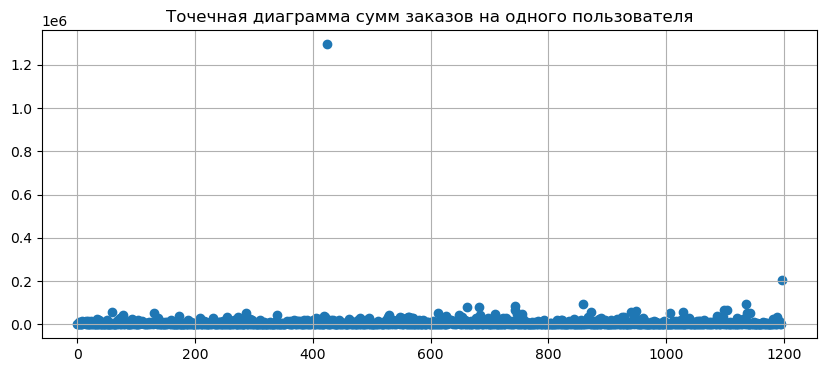

In [46]:
# построим диаграмму сумм заказов на одного пользователя
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,4))
plt.grid(True)
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя');

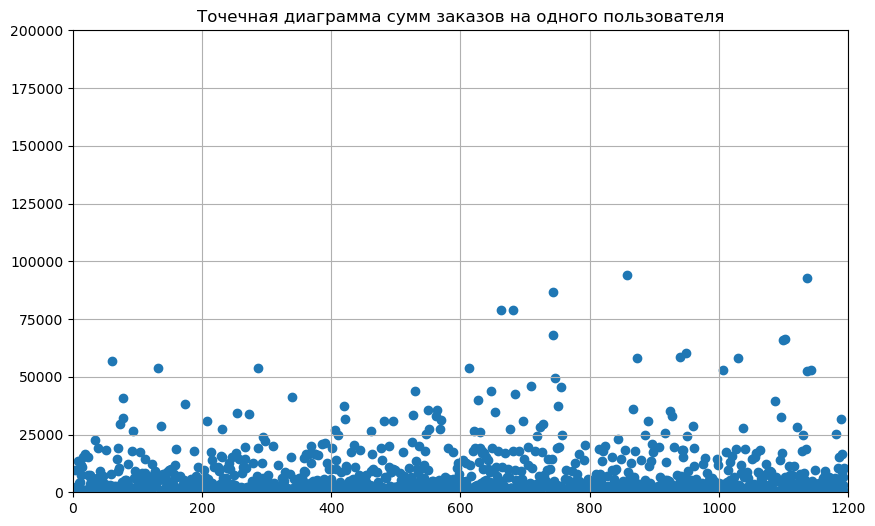

In [47]:
# масштабируем диаграмму
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(10,6))
plt.grid(True)
plt.axis([0,1200,0,200000])
plt.scatter(x_values, orders['revenue'])
plt.title('Точечная диаграмма сумм заказов на одного пользователя');

*Комментарий* 

Большинство стоимости заказов не превышают 20 000 - 30 000 тысяч. Есть выбросы в от 50 000 и до 100 000, выглядят аномалиями.  

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [48]:
# посчитаем перцентили
print('Перцентили:', np.percentile(orders['revenue'], [95, 99]))

Перцентили: [28000.  58233.2]


*Комментарий*

5% пользователей совершают покупки на 28 000 т., и 1% покупок превышает 58 233 т. Выберем 5% как границу аномальных заказов.

### Посчитем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

In [49]:
# сгруппируем пользователей группы А
orders_userA = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

In [50]:
# переименуем столбцы
orders_userA.columns = ['userId', 'orders']

In [51]:
# сгруппируем пользователей группы Б
orders_userB = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique})

In [52]:
# переименуем столбцы
orders_userB.columns = ['userId', 'orders']

In [53]:
sampleA = pd.concat([orders_userA['orders'],\
pd.Series(0, index=np.arange(cumulative_date[cumulative_date['group']=='A']['visitors'].sum()\
- len(orders_userA['orders'])), name='orders')],axis=0)

In [54]:
sampleB = pd.concat([orders_userB['orders'],\
pd.Series(0, index=np.arange(cumulative_date[cumulative_date['group']=='B']['visitors'].sum()\
- len(orders_userB['orders'])), name='orders')],axis=0)

Применим статистический критерий Манна-Уитни к полученным выборкам

Гипотезы:
    
Н0 Статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет.

Н1 Статистическая значимость различий есть.


In [55]:
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Отношение конверсии группы B в сравнении с группой А = {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.015
Отношение конверсии группы B в сравнении с группой А = 0.144


*Комментарий*

P-value = 0.015 меньше 0.05. Конверсия группы В выше конверсии группы А на 14%. Можем отвергнуть гипотезу, что в статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. Статистически значимые различия есть. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Гипотезы:
    
Н0 Статистической значимости различий в среднем чеке заказа между группами по «сырым» данным нет.
    
Н1 Статистическая значимость различий есть.


In [56]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительное изменения среднего чека группы B в сравнении с группой А = {0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Относительное изменения среднего чека группы B в сравнении с группой А = 0.259


*Комментарий*

    
P-value 0.72,  больше 0.05. Не отвергаем нулевую гипотезу, в среднем чеке заказа между группами по «сырым» данным в группах А и В мало различий. Отношение изменения среднего чека группы В на 25% больше чем у группы А.


### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.

Примем за аномалии тех, кто совершил 2 заказа и более.

Примем за аномалию тех, кто совершил заказ на сумму выше 28 000.

Узнаем сколько аномальных пользователей.

In [57]:
percentile_orders = 2
percentile_revenue = 28000

In [58]:
usersWithManyOrders = pd.concat(
    [
        orders_userA[orders_userA['orders'] > percentile_orders]['userId'],
        orders_userB[orders_userB['orders'] > percentile_orders]['userId'],
    ],
    axis=0,
)

In [59]:
usersWithExpensiveOrders = orders[orders['revenue'] > percentile_revenue]['visitorId']

In [60]:
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [61]:
print(abnormalUsers.head(5))
print('Кол-во аномальных пользователей:', abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Кол-во аномальных пользователей: 74


Подготовим выборки количества заказов по пользователям по группам теста

In [62]:

sampleAFiltered = pd.concat(
    [
        orders_userA[
            np.logical_not(orders_userA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_date[cumulative_date['group']=='A']['visitors'].sum() - len(orders_userA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [63]:

sampleBFiltered = pd.concat(
    [
        orders_userB[
            np.logical_not(orders_userB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                cumulative_date[cumulative_date['group']=='B']['visitors'].sum() - len(orders_userB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам

Гипотезы:
    
Н0 Статистически значимых различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет.
    
Н1 Статистическая значимость различий есть.



In [64]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Отношение конверсии группы B в сравнении с группой А = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value = 0.011
Отношение конверсии группы B в сравнении с группой А = 0.178


*Комментарий*

P-value = 0.011 меньше 0.05. Конверсия группы В выше конверсии группы А на 17%. Результат как и в «сырых» данных, группа В лучше чем группа А, стастическая значимость достигнута.  

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Гипотезы:
    
Н0 Статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным нет.
    
Н1 Статистическая значимость различий есть.


In [65]:
print('p-value = {0:.3f}'.format(stats.mannwhitneyu(orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], orders[np.logical_and(orders['group'] == 'B',\
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],)[1]))

print("Относительное изменения среднего чека группы B в сравнении с группой А = {0:.3f}".format(orders[np.logical_and(orders['group'] == 'B',\
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() / orders[np.logical_and(orders['group'] == 'A',\
np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value = 0.738
Относительное изменения среднего чека группы B в сравнении с группой А = -0.020


*Комментарий*

P-value 0.73, немного увеличилось по сравнению с результатами «сырых» данных. Разница между средними чеками отсутствует. 

### Примим решение по результатам теста и объясним его. 

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

**Выводы по А/В тестированию:**
    
Сырые данные:Количество заказов, р-value - 0.015 меньше 0.05. Конверсия группы В выше конверсии группы А на 14%. 
Средний чек, р-value 0.72, больше 0.05. Относительное изменения среднего чека группы В на 25% больше чем у группы А. 

Очищенные данные: Количество заказов, р-value - 0.011 меньше 0.05. Конверсия группы В выше конверсии группы А на 17%. 
Средний чек, р-value 0.73. Относительное изменения среднего чека группы В на 2% меньше чем у группы А. 



**Решение:**
На протяжении всего тестирования у группы B практически все время лучшие показатели по среднему чеку и конверсии. После очистки данных разница в средних чеках двух групп отсутствует. Но до очиски и после очистки данных конверсия группе B больше - сначала на 14%, затем на 17%. Статистическая значимость достигнута. Остановливаем тест и зафиксируем победу группы В.

## Общий вывод.

Определили, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

По графику отпределили, что был резкий скачек выручки в группе В на 17 августа. 

Кумулятивная конверсия зафиксировались и колеблятся примерно с разницей 0,005%. Группа В показывает большую конверсию.

Определили, что пользователи редко делают больше 2 заказов.

Определили, что сумма заказа редко превышает 28 000 тысяч. 

Статистическая значимость достигнута, конверсия группы В составляет 17% от группы А.

После очистки данных разница между средними чеками отсутствует.